# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

In [1]:
import seaborn as sns


import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# plotly and cufflinks

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
sns.load_dataset('geyser')

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [4]:
#this is how you load the data sets 

In [5]:
tips = sns.load_dataset('tips')
tips.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [12]:
tips._get_numeric_data()  #to get columns with numerics only

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [18]:
numeric_var=tips._get_numeric_data().columns

In [19]:
numeric_var

Index(['total_bill', 'tip', 'size'], dtype='object')

In [26]:
total=tips.columns
total

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [64]:
categorical_data=total.difference(numeric_var)

<AxesSubplot:>

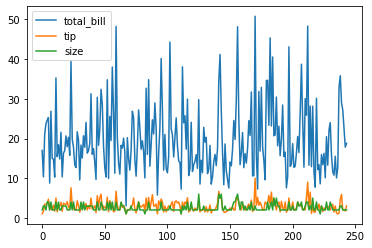

In [28]:
tips.plot()

In [53]:
numeric_var=tips._get_numeric_data().columns
numeric_var

Index(['total_bill', 'tip', 'size'], dtype='object')

<AxesSubplot:>

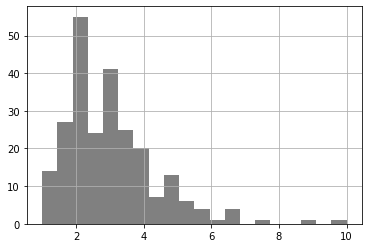

In [54]:
#histogram is only for univariate data
tips['tip'].hist(bins=20,color='grey')

<AxesSubplot:ylabel='Frequency'>

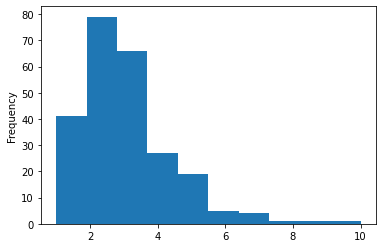

In [37]:
tips['tip'].plot(kind='hist')   #or this way

<AxesSubplot:ylabel='Frequency'>

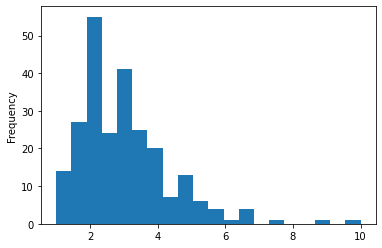

In [39]:
tips['tip'].plot(kind='hist',bins=20)   #changing the bins

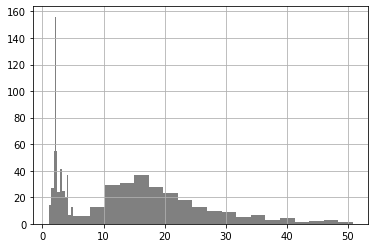

In [55]:
for i in numeric_var:
    tips[i].hist(bins=20,stacked=False,color='grey')

In [58]:
numeric_var

Index(['total_bill', 'tip', 'size'], dtype='object')

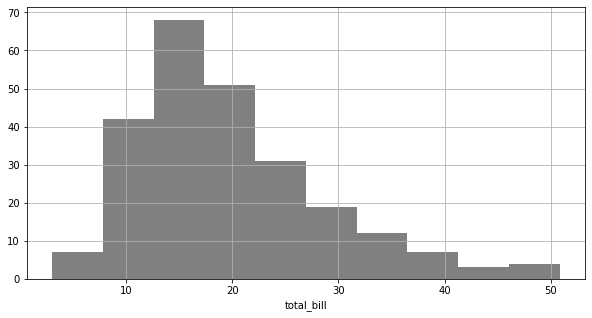

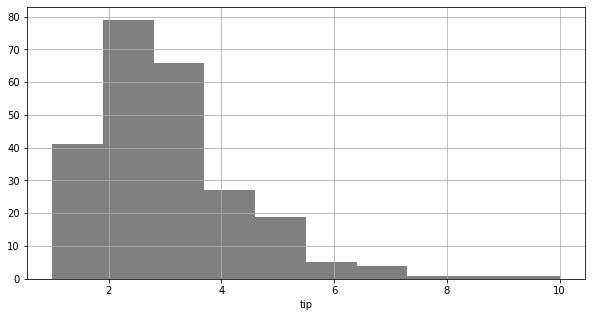

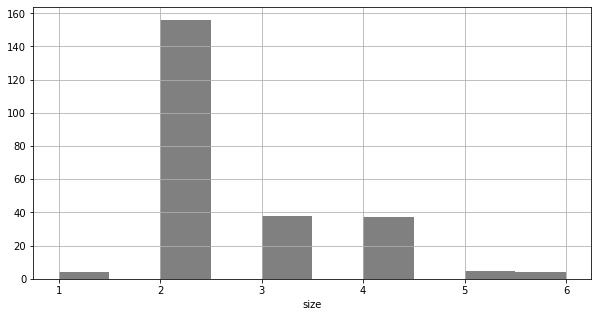

In [62]:
for i in numeric_var:
    plt.figure(figsize=[10,5])
    tips[i].hist(bins=10,color='grey')
    plt.xlabel(i)

<AxesSubplot:title={'center':'tip'}, xlabel='sex'>

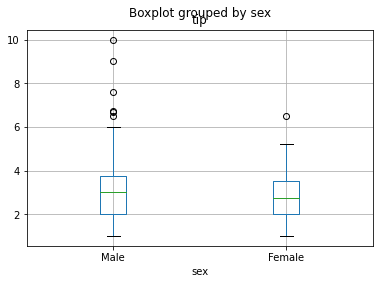

In [63]:
tips.boxplot(column='tip',by='sex')

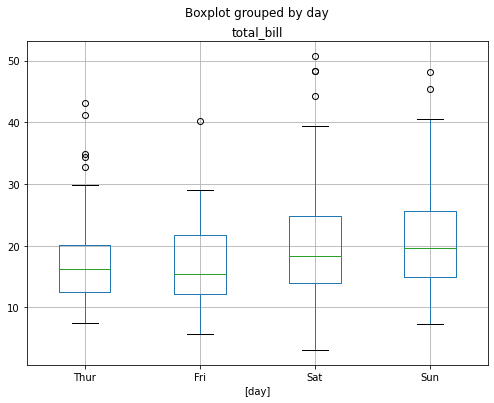

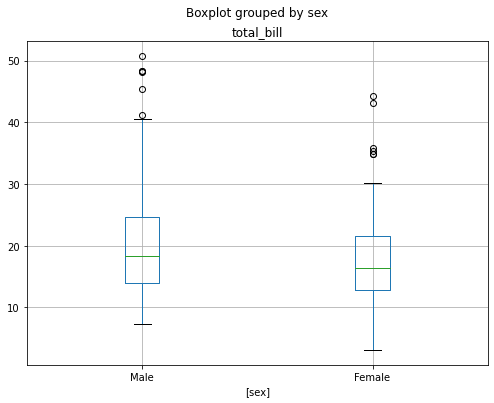

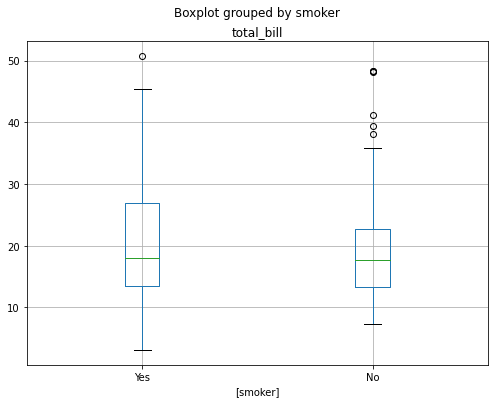

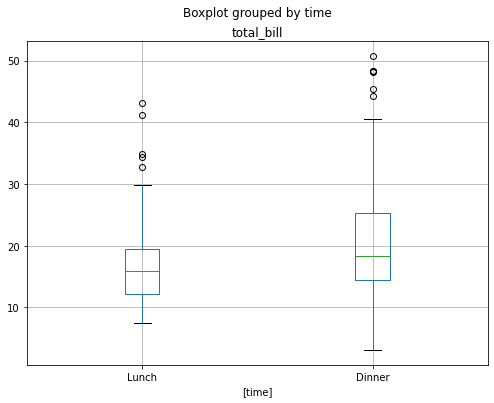

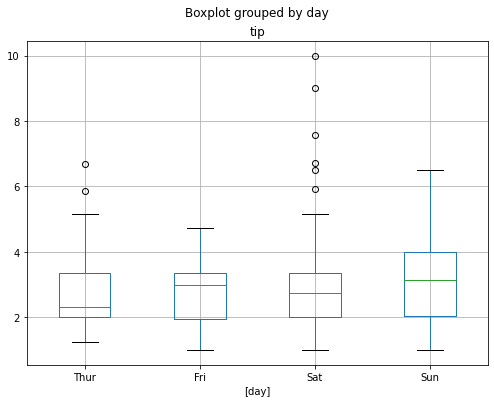

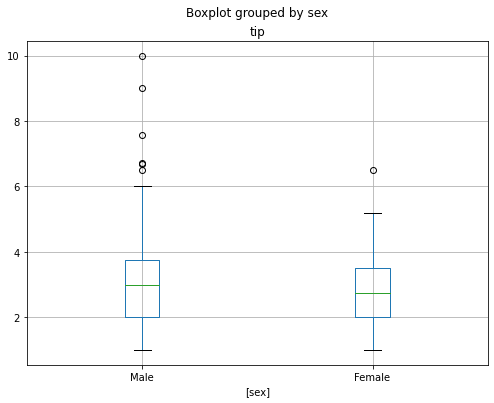

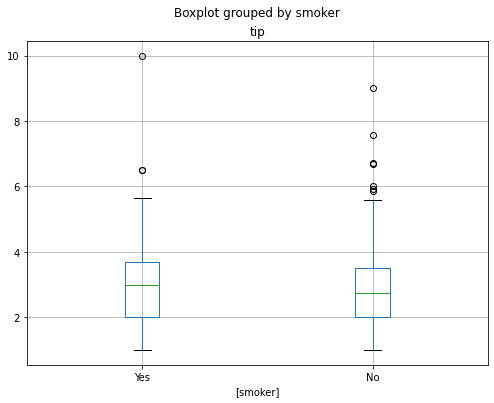

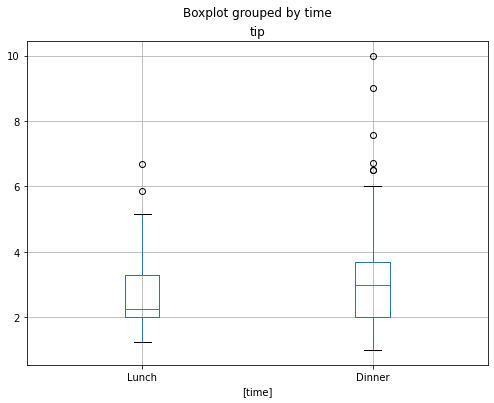

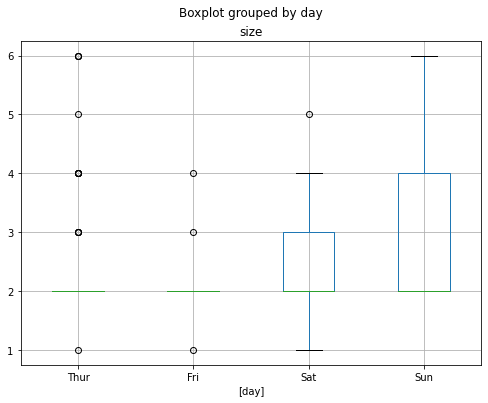

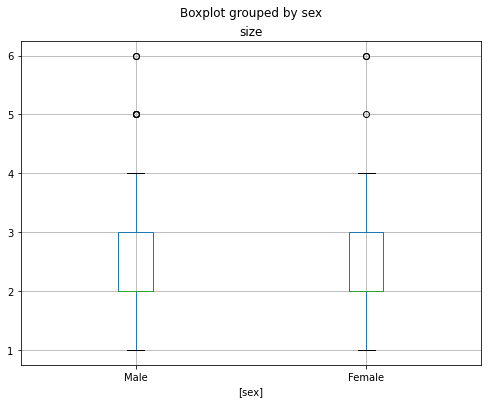

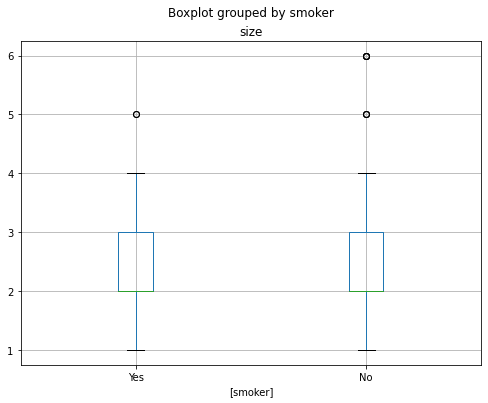

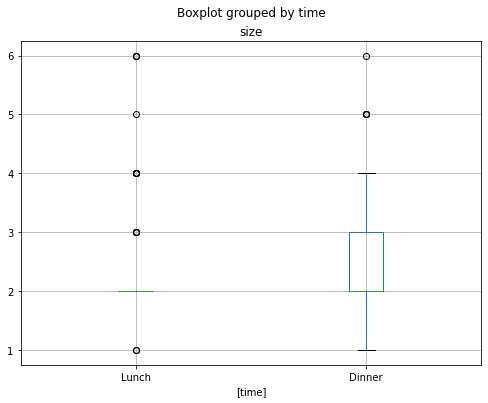

In [67]:
for i in numeric_var:
    for j in categorical_data:
        tips.boxplot(column=i,by=[j],grid=True,figsize=[8,6])

In [6]:
tips.groupby(['time','sex'])['tip'].sum()

time    sex   
Lunch   Male       95.11
        Female     90.40
Dinner  Male      389.96
        Female    156.11
Name: tip, dtype: float64

In [7]:
tips.groupby(['time','day']).sum()

total_bill     tip  size
time   day                           
Lunch  Thur     1077.55  168.83   150
       Fri        89.92   16.68    14
       Sat         0.00    0.00     0
       Sun         0.00    0.00     0
Dinner Thur       18.78    3.00     2
       Fri       235.96   35.28    26
       Sat      1778.40  260.40   219
       Sun      1627.16  247.39   216

In [8]:
#take datasets from kaggle

In [9]:
#.value_counts()

In [10]:
tips.groupby('time').sex.value_counts()   #gives count for spicific values grouped by specific elements

time          
Lunch   Female     35
        Male       33
Dinner  Male      124
        Female     52
Name: sex, dtype: int64

In [11]:
tips.groupby('time')['sex'].value_counts()

time          
Lunch   Female     35
        Male       33
Dinner  Male      124
        Female     52
Name: sex, dtype: int64

In [12]:
tips[tips['time'] =='Dinner']['tip'].sum()

546.0699999999999

In [13]:
tips[tips.time =='Dinner'].tip.sum()

546.0699999999999

In [14]:
tips.groupby('smoker').sex.value_counts().to_frame()

sex
smoker            
Yes    Male     60
       Female   33
No     Male     97
       Female   54

In [15]:
tips[tips['smoker']=='Yes']['sex'].value_counts()

Male      60
Female    33
Name: sex, dtype: int64

In [16]:
tips[tips.smoker=='No'].sex.value_counts().to_frame()

,sex
Male,97
Female,54


Pearsons correlation - .corr()

In [17]:
tips.corr() # calculated numerical data

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [18]:
#correlation works on int/float only and shows dependency of data on one another


##### colormaps 
https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [19]:
#when multiple rows and columns use heatmap
#only size and tip: define values on axis

In [20]:
#plt-plot 
#figure(to change figure size(width ,height))
#fmt-> prints decimal upto that values 0.4 floating values
#annot -> prints data on colours
#cmap -> different colours implemented

<AxesSubplot:>

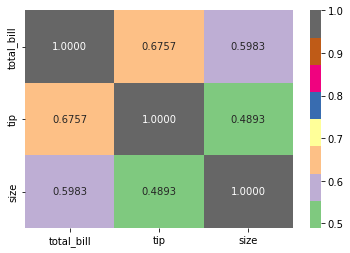

In [21]:
fig = plt.figure(figsize = (6,4))

sns.heatmap(tips.corr(), annot = True, fmt = '0.4f',  cmap="Accent")

In [22]:
#describe fn displays all data

In [23]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

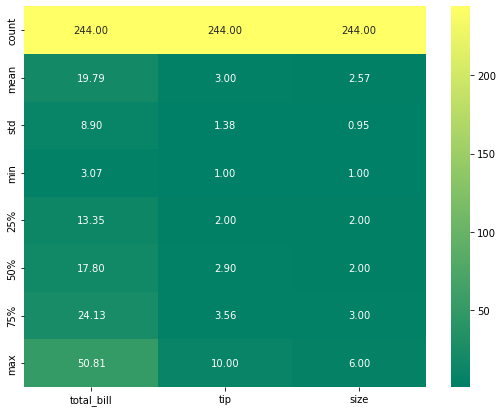

In [24]:
fig = plt.figure(figsize = (9,7))

sns.heatmap(tips.describe(), annot = True, fmt = '0.2f',  cmap="summer")

In [25]:
tips.shape

(244, 7)

In [26]:
tips.iloc[0:20].isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


<AxesSubplot:>

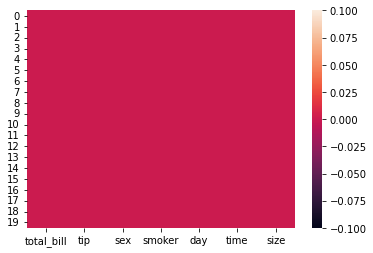

In [27]:
sns.heatmap(tips.iloc[:20].isnull())   #as no null values

In [28]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

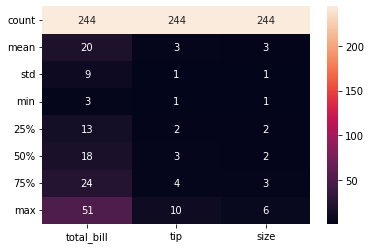

In [29]:
sns.heatmap(tips.describe(), annot = True, fmt = '0.0f')

<AxesSubplot:>

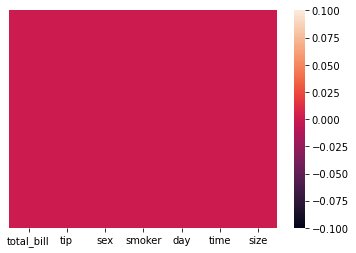

In [30]:
sns.heatmap(tips.isnull(),yticklabels = False)

## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean:


In [31]:
tips['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [32]:
#enumerate gives index and values 
#enumerate([male,female]) i,v
#i=o v=male
#i=1,v=female

In [33]:
#plt.text(xaxis position,yaxis position,'text to be displayed')

In [106]:
#hue is for categorical values only

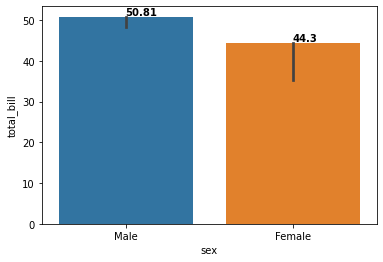

In [34]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.max)

for i, v in enumerate(['Male','Female']):
    plt.text(i, tips[tips['sex']==v]['total_bill'].max()+0.5, 
             tips[tips['sex']==v]['total_bill'].max(),
             color='black', 
             fontweight='bold')

    
# plt.text( x,y , data to be plotted  color, fonty style)    
plt.show()


In [35]:
for i,v in enumerate(['Yes','No']):
    print(i,v)

0 Yes
1 No


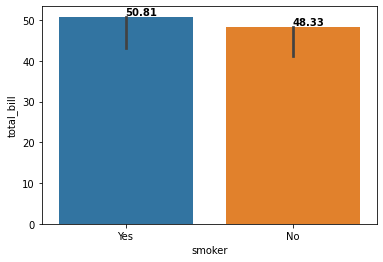

In [36]:
sns.barplot(x='smoker',y='total_bill',data=tips, estimator=np.max)

for i, v in enumerate(['Yes','No']):
    plt.text(i, tips[tips['smoker']==v]['total_bill'].max()+0.5, 
             tips[tips['smoker']==v]['total_bill'].max(),
             color='black', 
             fontweight='bold')

    
# plt.text( x,y , data to be plotted  color, fonty style)    
plt.show()


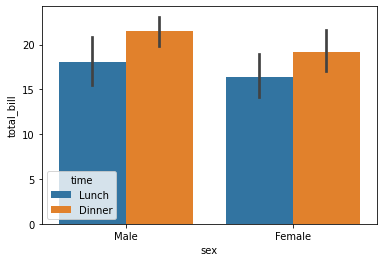

In [37]:
sns.barplot(x='sex',y='total_bill',data=tips, hue='time',estimator=np.mean); # default estimator is Mean

sex     smoker
Male    Yes       22.284500
        No        19.791237
Female  Yes       17.977879
        No        18.105185
Name: total_bill, dtype: float64

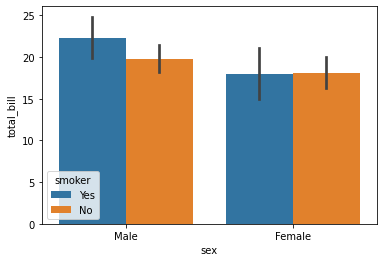

In [38]:
sns.barplot(x='sex',y='total_bill',data=tips,hue='smoker',estimator=np.mean); #grouped by smoking 
tips.groupby(['sex','smoker'])['total_bill'].mean() #this is displayed in graph form by above code

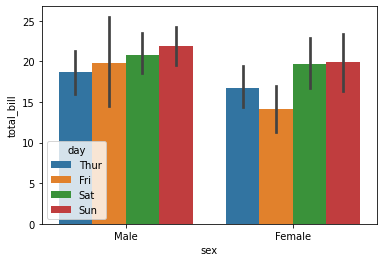

In [39]:
sns.barplot(x='sex',y='total_bill',data=tips, hue='day',estimator=np.mean); #hue applied on categorical column not unique values

In [40]:
#use this 
#https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [41]:
import numpy as np

In [42]:
#estimator-> upper bound of graph

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

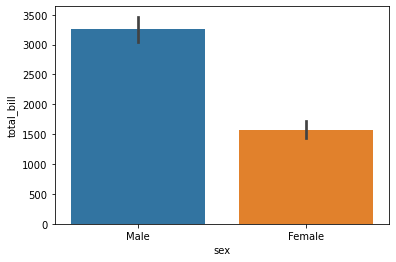

In [43]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator= np.sum)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

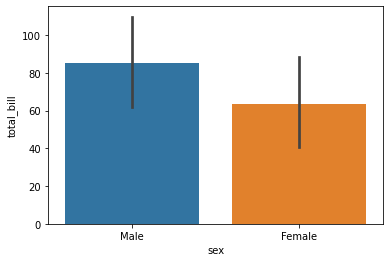

In [44]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator= np.var)

You can change the estimator object to your own function, that converts a vector to a scalar:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

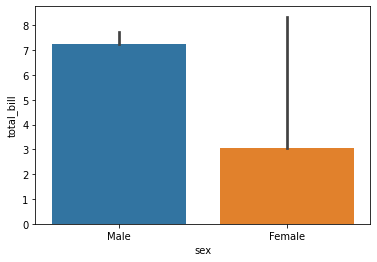

In [45]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator= np.min)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

In [46]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


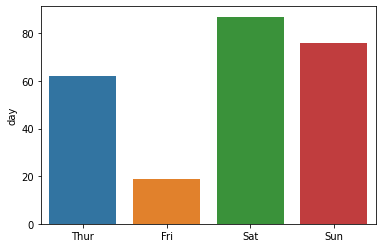

In [47]:
tips.day.value_counts().to_frame()

sns.barplot(tips.day.value_counts().to_frame().index,
            tips.day.value_counts().to_frame().day, 
            data=tips.day.value_counts().to_frame());

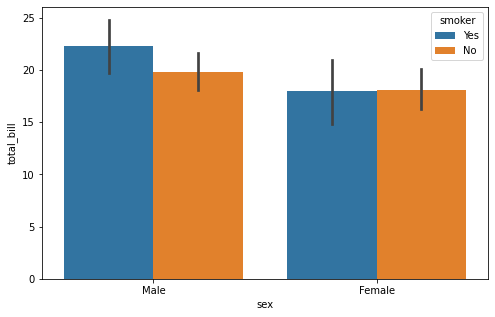

In [48]:
fig = plt.figure(figsize = (8,5))
sns.barplot(x='sex', y='total_bill', data=tips, hue='smoker', estimator=np.mean); # default estimator is Mean


# for i, v in enumerate(['Male','Female']):
#     plt.text(i,  #x
#              tips[(tips['sex']==v) & (tips['smoker']=='Yes')]['total_bill'].mean()+0.5,
#              tips[tips['sex']==v]['total_bill'].mean(),   # value to be plotted 
#              color='red', 
#              fontweight='bold')


# for i, v in enumerate(['Male','Female']):
#     plt.text(i-0.2,  #x
#              tips[(tips['sex']==v) & (tips['smoker']=='No')]['total_bill'].mean()+0.5,
#              np.round(tips[tips['sex']==v]['total_bill'].mean(),2),   # value to be plotted 
#              color='red', 
#              fontweight='bold')

plt.show()


In [49]:
tips.groupby('time')['day'].value_counts()

time        
Lunch   Thur    61
        Fri      7
        Sat      0
        Sun      0
Dinner  Sat     87
        Sun     76
        Fri     12
        Thur     1
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

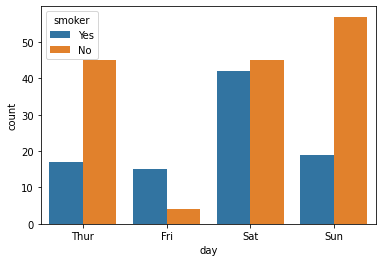

In [50]:
sns.countplot(x='day',data=tips, hue = 'smoker')

<AxesSubplot:xlabel='count', ylabel='time'>

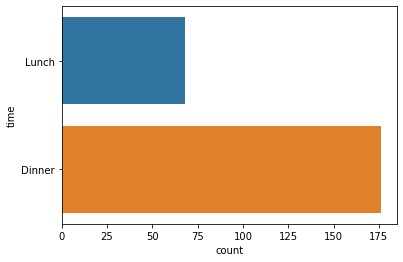

In [51]:
sns.countplot(y='time',data=tips)

In [52]:
#age=5,20,34,50,32,26,102,24,44,54,...
#5 & 102 are outliers could be typo or exception 

In [53]:
# iqr=q3-q1
# up_limit=q3+(1.5*iqr)
# low_limit=q1-(1.5*iqr)


## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

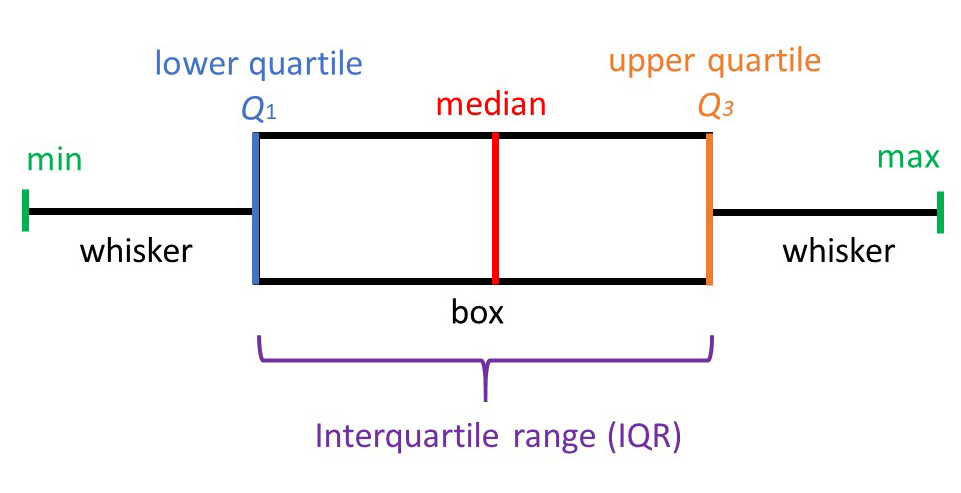

"q3,q1 = 75,25\nIQR = q3-q1 # Interquantile Range\nmax = q3 + 1.5*IQR\nmin = q1 - 1.5*IQR\n\n-----------------------------------------------\nq1,q3 =np.percentile(df1[Total bill],[25,75])\niqr=q3-q1\nmin=q1-(1.5*iqr)\nmax=q3+(1.5*iqr)\ndf['total_bill'].median()\n"

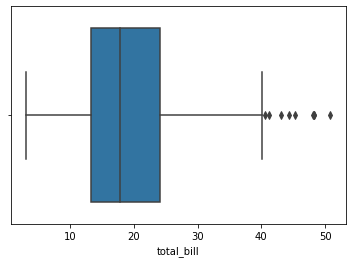

In [54]:
sns.boxplot(x = 'total_bill', data = tips)

'''q3,q1 = 75,25
IQR = q3-q1 # Interquantile Range
max = q3 + 1.5*IQR
min = q1 - 1.5*IQR

-----------------------------------------------
q1,q3 =np.percentile(df1[Total bill],[25,75])
iqr=q3-q1
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
df['total_bill'].median()
'''


In [71]:
ab = sns.load_dataset('tips')
ab.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [91]:
ab['smoker'].dtype

CategoricalDtype(categories=['Yes', 'No'], ordered=False)

In [92]:
def fn(d,col):
    for c in col:
        if d[c].dtype != object:
            q1,q3=np.percentile(d[c],[25,75])
        iqr=q3-q1
        mn=q1-(1.5*iqr)
        mx=q3+(1.5*iqr)
        med=d[c].median()
        d[c]=d[c].apply(lambda x: mx if x>mx else mn if x<mn else x)
            
        return d    
    

In [93]:
fn(ab,['total_bill','tip'])

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01000,Female,No,Sun,Dinner,2
1,10.34,1.66000,Male,No,Sun,Dinner,3
2,21.01,3.50000,Male,No,Sun,Dinner,3
3,23.68,3.31000,Male,No,Sun,Dinner,2
4,24.59,3.61000,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.90625,Male,No,Sat,Dinner,3
240,27.18,2.00000,Female,Yes,Sat,Dinner,2
241,22.67,2.00000,Male,Yes,Sat,Dinner,2
242,17.82,1.75000,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='tip'>

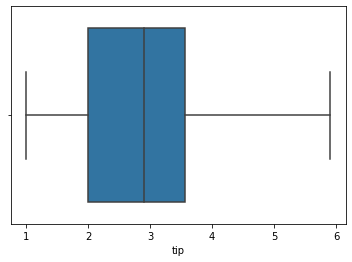

In [94]:
#to check the outliers
sns.boxplot(x = 'tip', data = ab)

In [80]:
# def fnc():
#     q1,q3 =np.percentile(ab['tip'],[25,75])
#     iqr=q3-q1
#     minimum=q1-(1.5*iqr)
#     maximum=q3+(1.5*iqr)
#     ab.where((ab['tip']>maximum)| (ab['tip']<minimum),ab['tip']==ab['tip'].median(),ab['tip'])
#     ab

# sns.boxplot(x = 'total_bill', data = ab)

In [88]:
#correct the code 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill'>

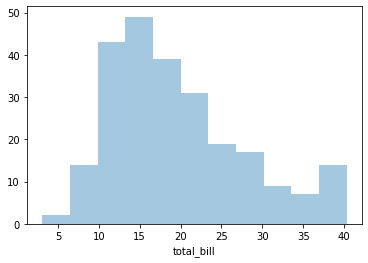

In [95]:
sns.distplot(ab['total_bill'],kde=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

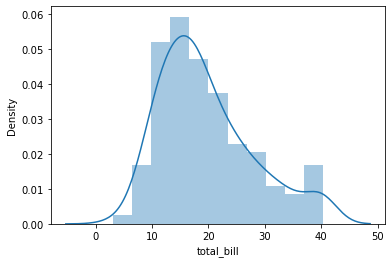

In [97]:
sns.distplot(ab['total_bill'])   #by def. kde=true, which gives prob.

In [57]:
np.arange(1,101)


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [99]:
tips.describe(percentiles=[0.01,0.02,.03,.04,0.05,0.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T


,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
total_bill,244.0,19.785943,8.902412,3.07,7.25,7.5530,8.3964,8.5632,9.5575,10.34,13.3475,17.795,24.1275,32.235,38.0610,39.630,41.0044,44.447,48.2270,50.81
tip,244.0,2.998279,1.383638,1.00,1.00,1.0874,1.2500,1.3004,1.4400,1.50,2.0000,2.900,3.5625,5.000,5.1955,5.706,5.9768,6.528,7.2145,10.00
size,244.0,2.569672,0.951100,1.00,1.00,2.0000,2.0000,2.0000,2.0000,2.00,2.0000,2.000,3.0000,4.000,4.0000,4.000,5.0000,5.000,6.0000,6.00


<AxesSubplot:ylabel='Frequency'>

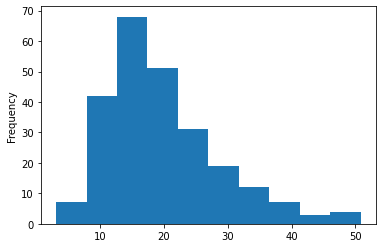

In [101]:
tips['total_bill'].plot(kind='hist')

<AxesSubplot:>

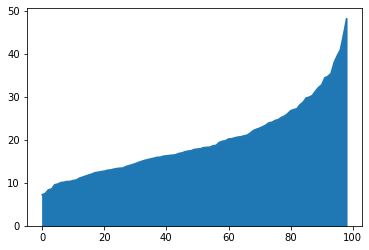

In [102]:
pd.Series(np.percentile(tips['total_bill'],range(1,100))).plot(kind='area')

In [60]:
q1,q3 =np.percentile(tips['total_bill'],[25,90])
iqr=q3-q1
min1=q1-(1.5*iqr)
max1=q3+(1.5*iqr)

print(q1, q3, max1, min1)

13.3475 32.23500000000001 60.56625000000002 -14.983750000000011


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

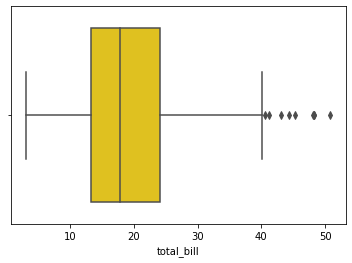

In [103]:
sns.boxplot("total_bill", data=tips, palette='prism')

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

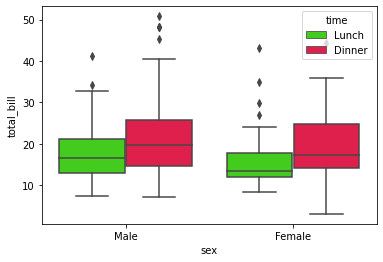

In [104]:
sns.boxplot(x="sex", y="total_bill", data=tips, palette='prism', hue='time')

<AxesSubplot:>

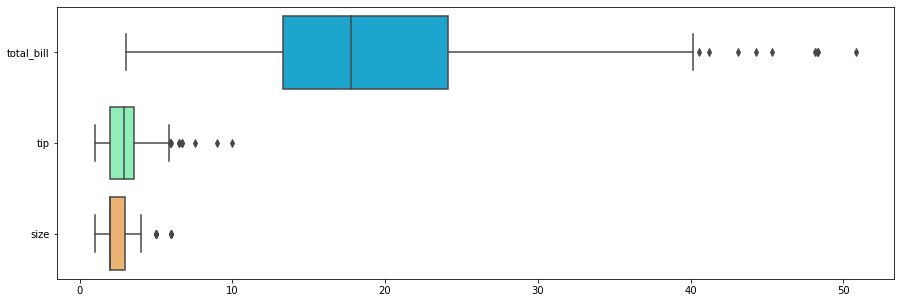

In [63]:
# Can do entire dataframe with orient='h'
fig = plt.figure(figsize = (15,5))

sns.boxplot(data=tips,palette='rainbow',orient='h')

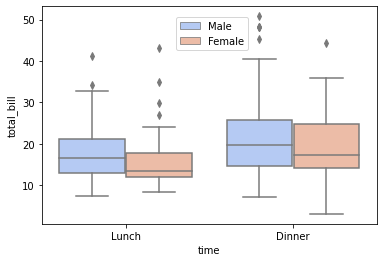

In [105]:
sns.boxplot(x="time", y="total_bill", 
            hue="sex",
            data=tips,
            palette="coolwarm")

plt.legend(loc = (0.4,0.8))# Left , Bottom

# plt.legend(loc = 'best') # predefined positions for loc ranging from 1-10 , 'best'

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

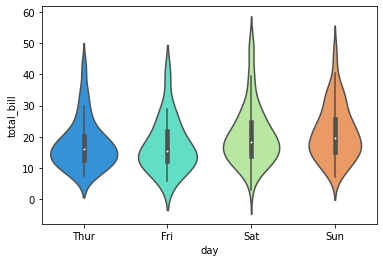

In [40]:
sns.violinplot(x="day", y="total_bill", data=tips, palette='rainbow')

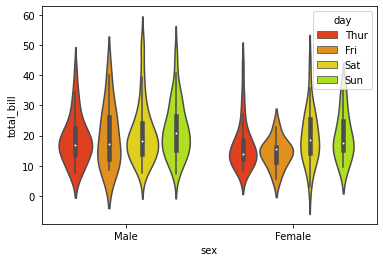

In [108]:
sns.violinplot(x="sex", 
               y="total_bill", 
               data=tips,
               hue='day',
               palette='prism')
plt.show()                      #plt.show()  ends the graph next code wont overlap this graph

<AxesSubplot:xlabel='day', ylabel='total_bill'>

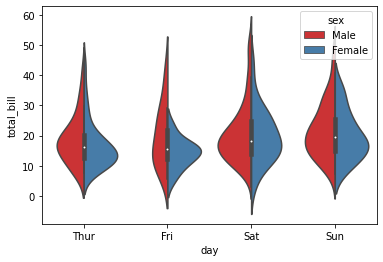

In [42]:
sns.violinplot(x="day", y="total_bill",
               data=tips,
               hue='sex',
               split=True,
               palette='Set1')

## stripplot and swarmplot
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

<AxesSubplot:xlabel='day', ylabel='total_bill'>

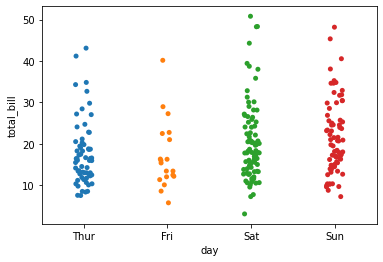

In [43]:
# sns.set_style('darkgrid') #darkgrid, whitegrid, dark, white, ticks

sns.stripplot(x="day", y="total_bill", data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

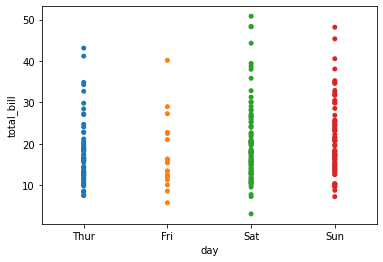

In [44]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False)

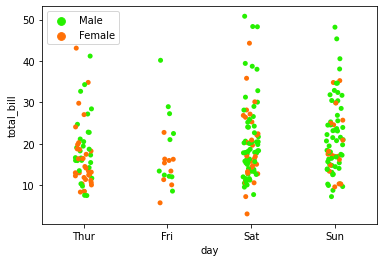

In [110]:
sns.stripplot(x="day", y="total_bill", data=tips,
              jitter=True,
              hue='sex',
              palette='gist_ncar')
plt.legend(loc='best')  #or use 1-10 for diff location of legend 

C:\Users\Dralls\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


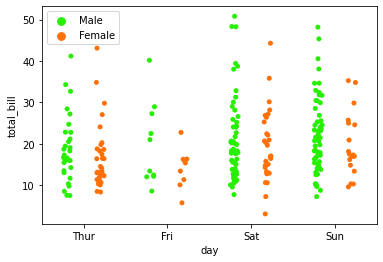

In [46]:
sns.stripplot(x="day", y="total_bill", data=tips,
              jitter=True,
              hue='sex',
              palette='gist_ncar',
              split=True)

plt.legend(loc = 'best')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

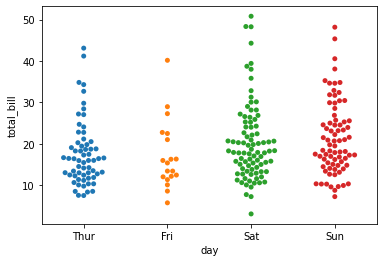

In [47]:
sns.swarmplot(x="day", y="total_bill", data=tips)

C:\Users\Dralls\anaconda3\lib\site-packages\seaborn\categorical.py:2989: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\Dralls\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='day', ylabel='total_bill'>

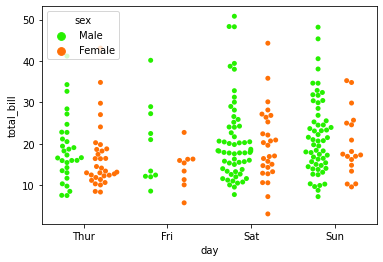

In [48]:
sns.swarmplot(x="day", y="total_bill",
              hue='sex',
              data=tips,
              palette="gist_ncar",
              split=True)

### Combining Categorical Plots

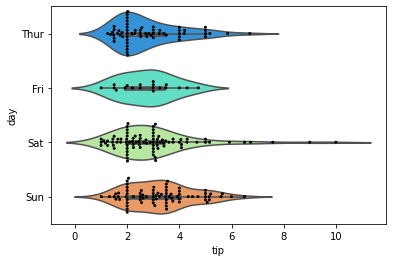

In [49]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

plt.show()

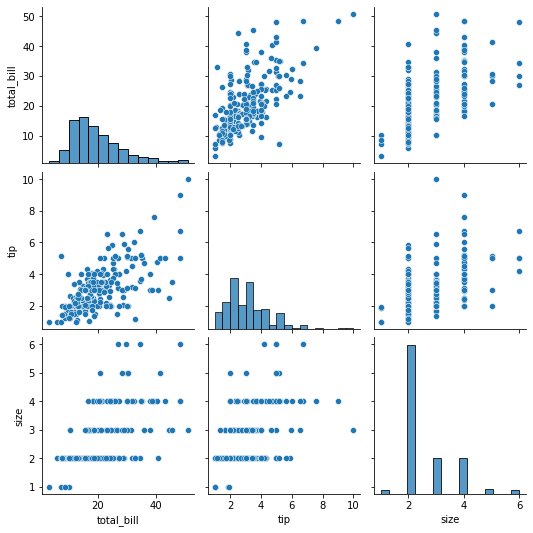

In [111]:
#plots all wrt others 
sns.pairplot(tips)

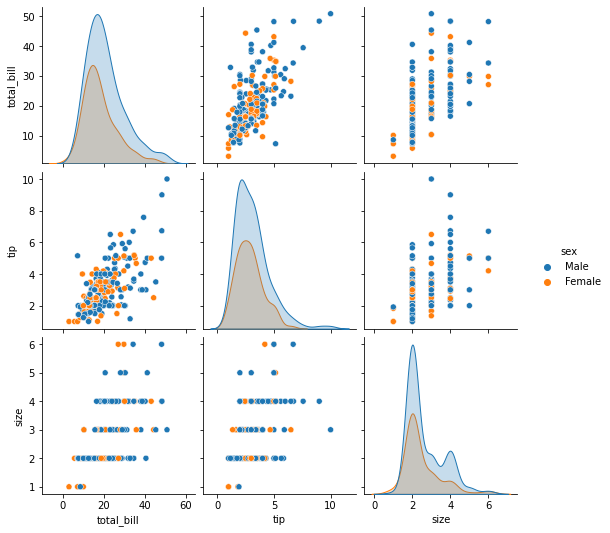

In [112]:
sns.pairplot(tips,hue='sex')    #shift+tab for list of fns with examples
plt.show()

In [ ]:
b